# Initial codes

This notebook illustrates how Bayesian inference can be used to infer response rates of each group (basket) in a Basket trial.

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import sys
from os.path import exists

sys.path.append('..')
sys.path.append('.')

In [3]:
import numpy as np
import pandas as pd
import arviz as az

In [4]:
from pyBasket.env import Trial, TrueResponseSite, TrueResponseWithClusteringSite
from pyBasket.common import DEFAULT_DECISION_THRESHOLD, DEFAULT_DECISION_THRESHOLD_INTERIM
from pyBasket.common import MODEL_INDEPENDENT, MODEL_INDEPENDENT_BERN, MODEL_BHM, MODEL_PYBASKET

In [5]:
DEBUG = True

In [6]:
num_burn_in = 5E3
num_posterior_samples = 5E3
num_chains = None # let pymc decide

In [7]:
if DEBUG:
    num_burn_in = 1E3
    num_posterior_samples = 1E3
    num_chains = 4

### Generate data

In [8]:
K = 6  # the number of groups
p0 = 0.2  # null response rate
p1 = 0.4  # target response rate
enrollments = [[14, 10] for _ in range(K)]
evaluate_interim = [True, True]  # evaluate every interim stage
true_response_rates = [p0, p0, p0, p0, p0, p0]

n_classes = K
n_clusters = 5
site = TrueResponseWithClusteringSite(enrollments, n_classes, n_clusters, true_response_rates=true_response_rates)
analysis_names = [MODEL_INDEPENDENT, MODEL_BHM]

In [9]:
dt = DEFAULT_DECISION_THRESHOLD
dt_interim = DEFAULT_DECISION_THRESHOLD_INTERIM
early_futility_stop = False

In [10]:
trial = Trial(K, p0, p1, site, evaluate_interim, 
              num_burn_in, num_posterior_samples, analysis_names, 
              dt=dt, dt_interim=dt_interim,
              early_futility_stop=early_futility_stop,
              num_chains=num_chains)

done = trial.reset()
while not done:
    done = trial.step()

2023-06-28 13:12:34.401 | DEBUG    | pyBasket.env:step:245 - 
########## Stage=0 ##########

2023-06-28 13:12:34.404 | DEBUG    | pyBasket.env:step:258 - Registering Group 0 (OPEN): 1/14 for Analysis independent
2023-06-28 13:12:34.404 | DEBUG    | pyBasket.env:step:258 - Registering Group 0 (OPEN): 1/14 for Analysis BHM
2023-06-28 13:12:34.405 | DEBUG    | pyBasket.env:step:258 - Registering Group 1 (OPEN): 1/14 for Analysis independent
2023-06-28 13:12:34.405 | DEBUG    | pyBasket.env:step:258 - Registering Group 1 (OPEN): 1/14 for Analysis BHM
2023-06-28 13:12:34.405 | DEBUG    | pyBasket.env:step:258 - Registering Group 2 (OPEN): 4/14 for Analysis independent
2023-06-28 13:12:34.405 | DEBUG    | pyBasket.env:step:258 - Registering Group 2 (OPEN): 4/14 for Analysis BHM
2023-06-28 13:12:34.406 | DEBUG    | pyBasket.env:step:258 - Registering Group 3 (OPEN): 2/14 for Analysis independent
2023-06-28 13:12:34.406 | DEBUG    | pyBasket.env:step:258 - Registering Group 3 (OPEN): 2/14 for 

### Check last results

### Simple

In [11]:
analysis_name = analysis_names[0]
analysis_name

'independent'

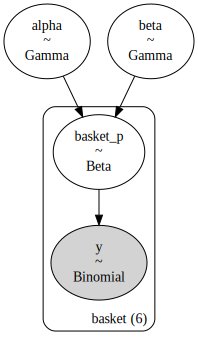

In [12]:
trial.visualise_model(analysis_name)

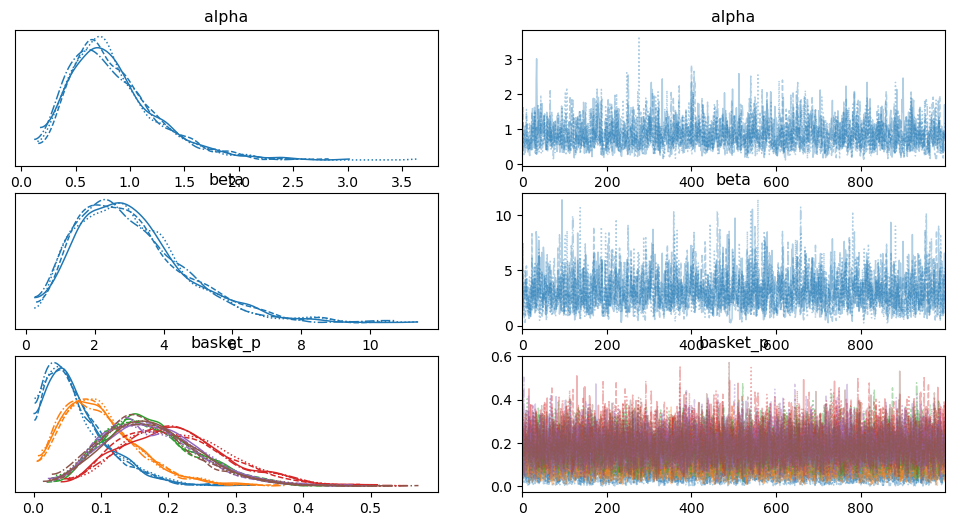

In [13]:
trial.plot_trace(analysis_name, -1)

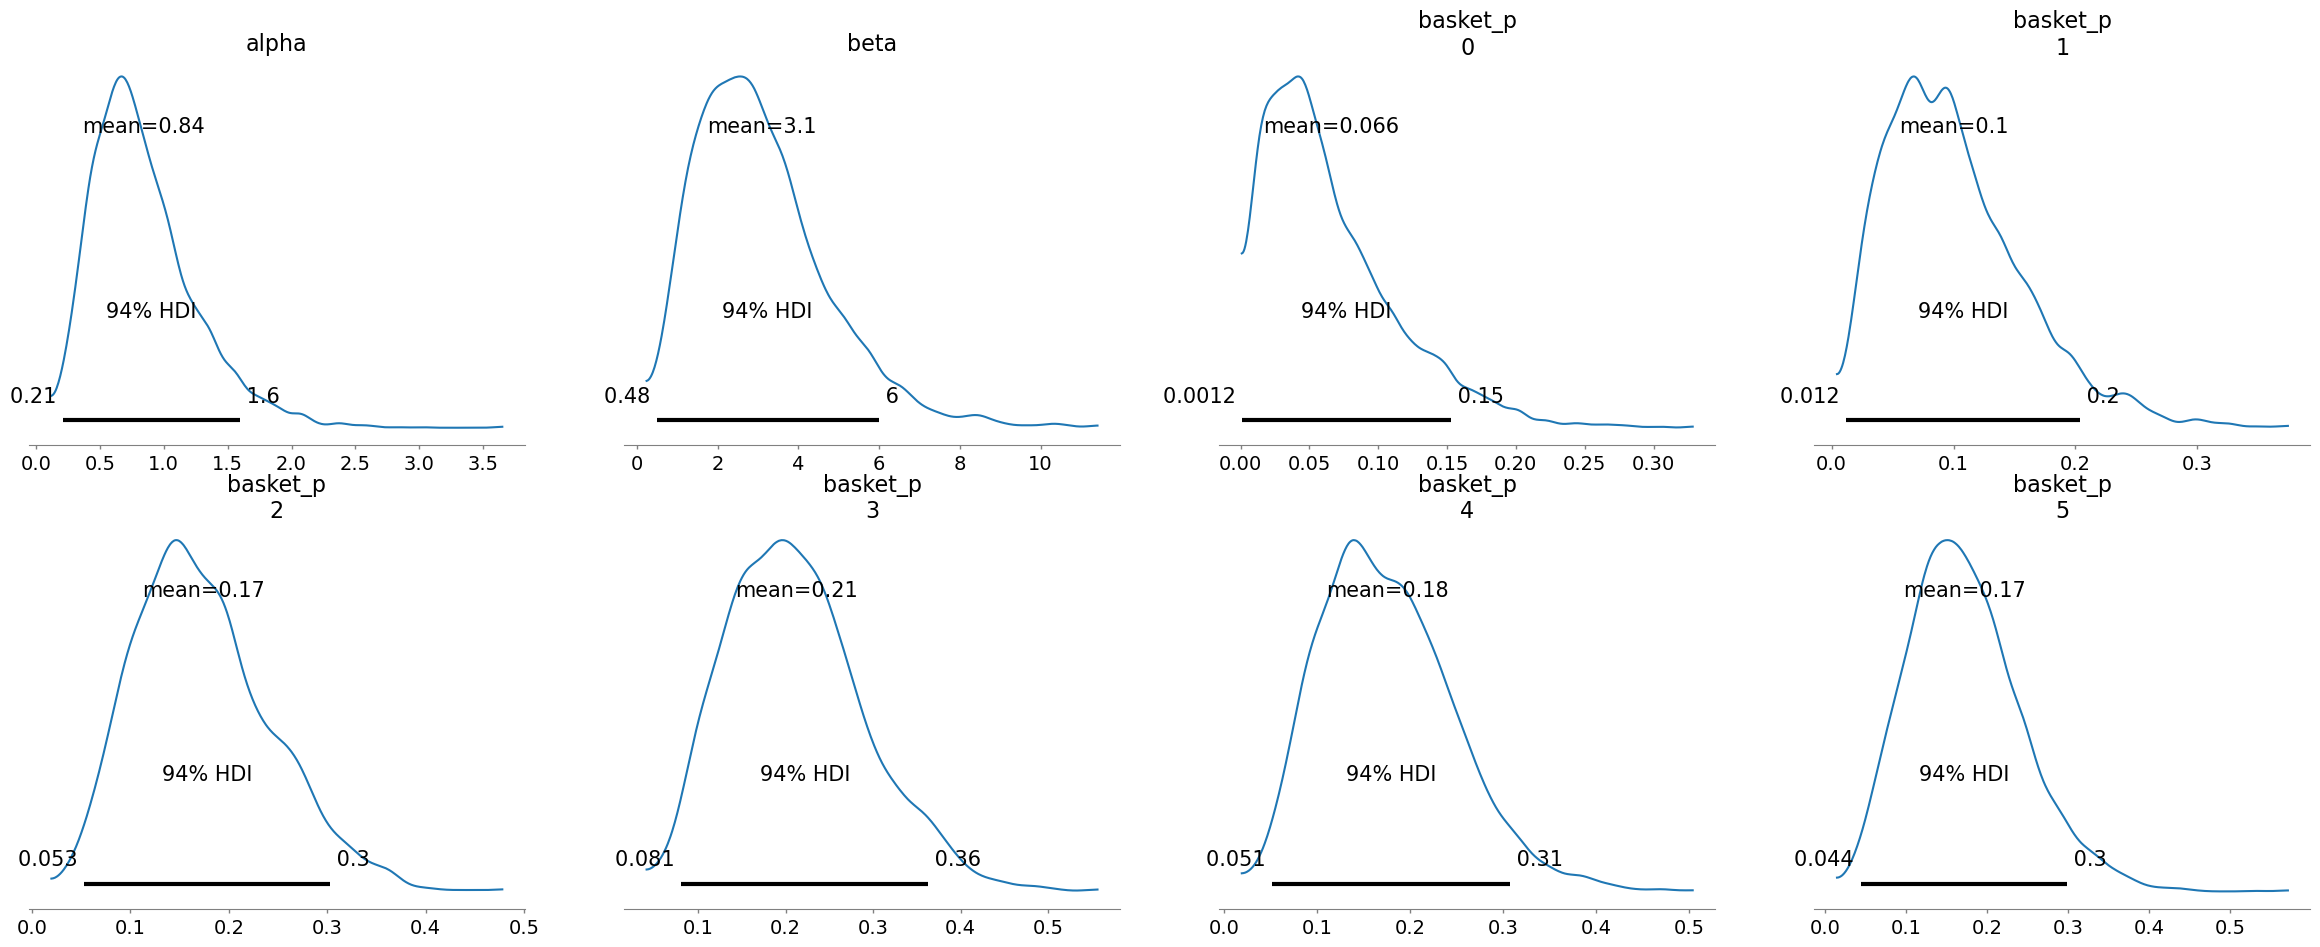

In [14]:
trial.plot_posterior(analysis_name, -1)

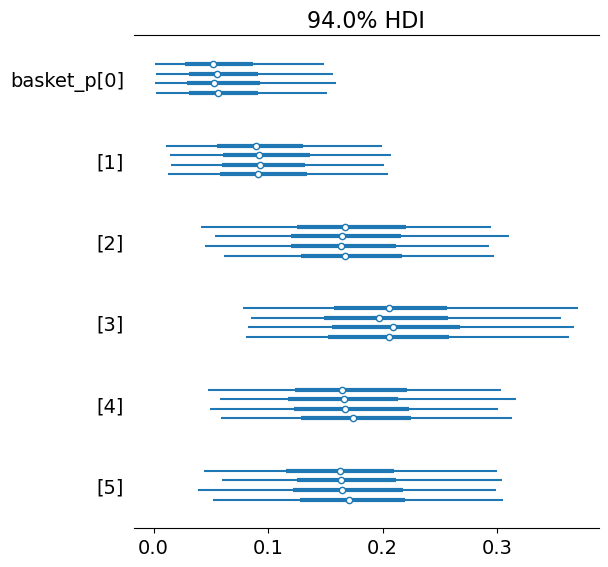

In [15]:
trial.plot_forest(analysis_name, -1)

In [16]:
trial.interim_report(analysis_name)

,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.01850,0.05,False,OPEN,1,14
1,0.01675,0.05,False,OPEN,1,14
2,0.37425,0.05,True,OPEN,4,14
3,0.07600,0.05,True,OPEN,2,14
4,0.39550,0.05,True,OPEN,4,14
5,0.20250,0.05,True,OPEN,3,14


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.01550,0.9,False,COMPLETED_INEFFECTIVE,1,24
1,0.05925,0.9,False,COMPLETED_INEFFECTIVE,2,24
2,0.31625,0.9,False,COMPLETED_INEFFECTIVE,4,24
3,0.52275,0.9,False,COMPLETED_INEFFECTIVE,5,24
4,0.34150,0.9,False,COMPLETED_INEFFECTIVE,4,24
5,0.31525,0.9,False,COMPLETED_INEFFECTIVE,4,24


In [17]:
trial.final_report(analysis_name)

,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.01550,0.9,False,COMPLETED_INEFFECTIVE,1,24
1,0.05925,0.9,False,COMPLETED_INEFFECTIVE,2,24
2,0.31625,0.9,False,COMPLETED_INEFFECTIVE,4,24
3,0.52275,0.9,False,COMPLETED_INEFFECTIVE,5,24
4,0.34150,0.9,False,COMPLETED_INEFFECTIVE,4,24
5,0.31525,0.9,False,COMPLETED_INEFFECTIVE,4,24


### BHM

In [18]:
analysis_name = analysis_names[1]
analysis_name

'BHM'

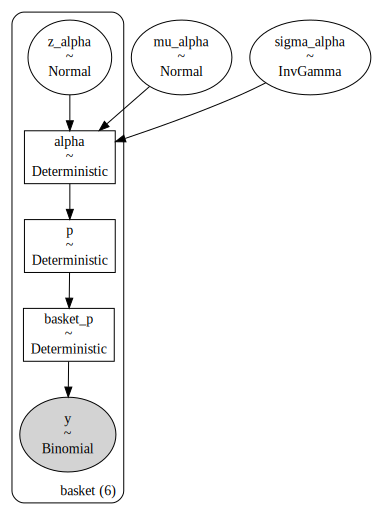

In [19]:
trial.visualise_model(analysis_name)

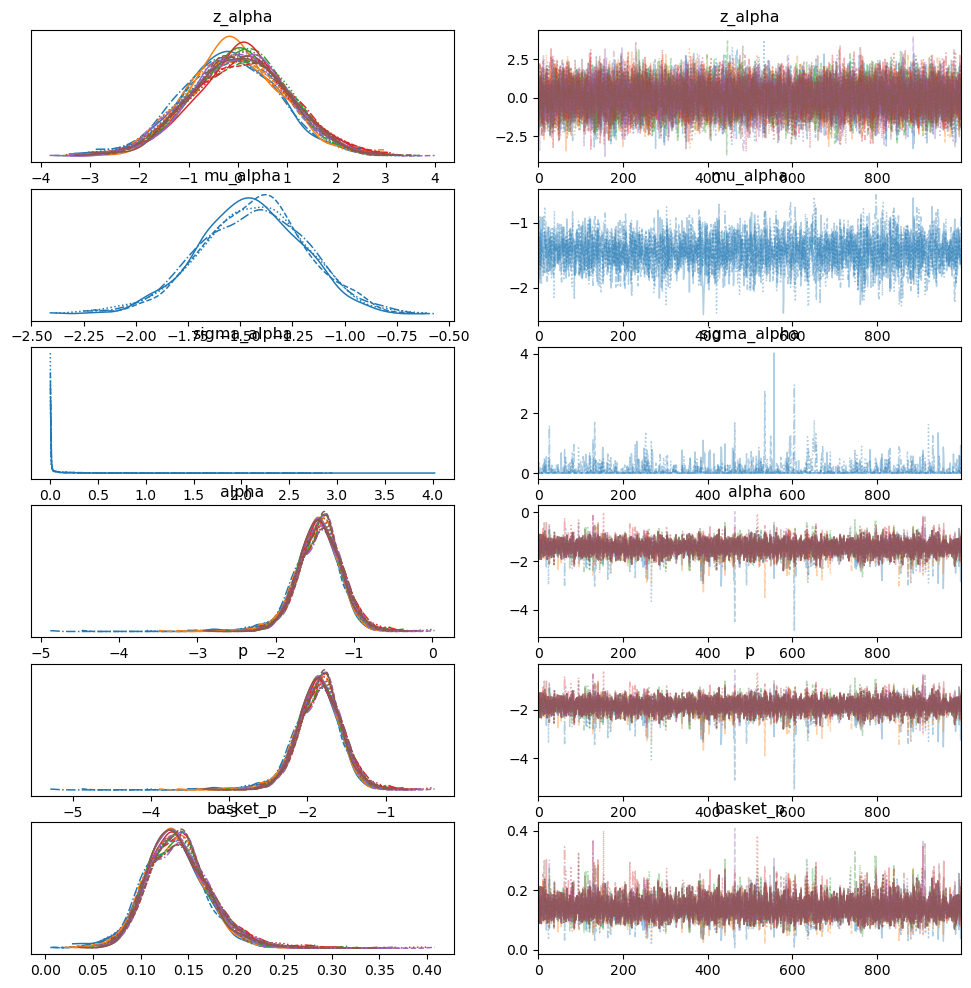

In [20]:
trial.plot_trace(analysis_name, -1)

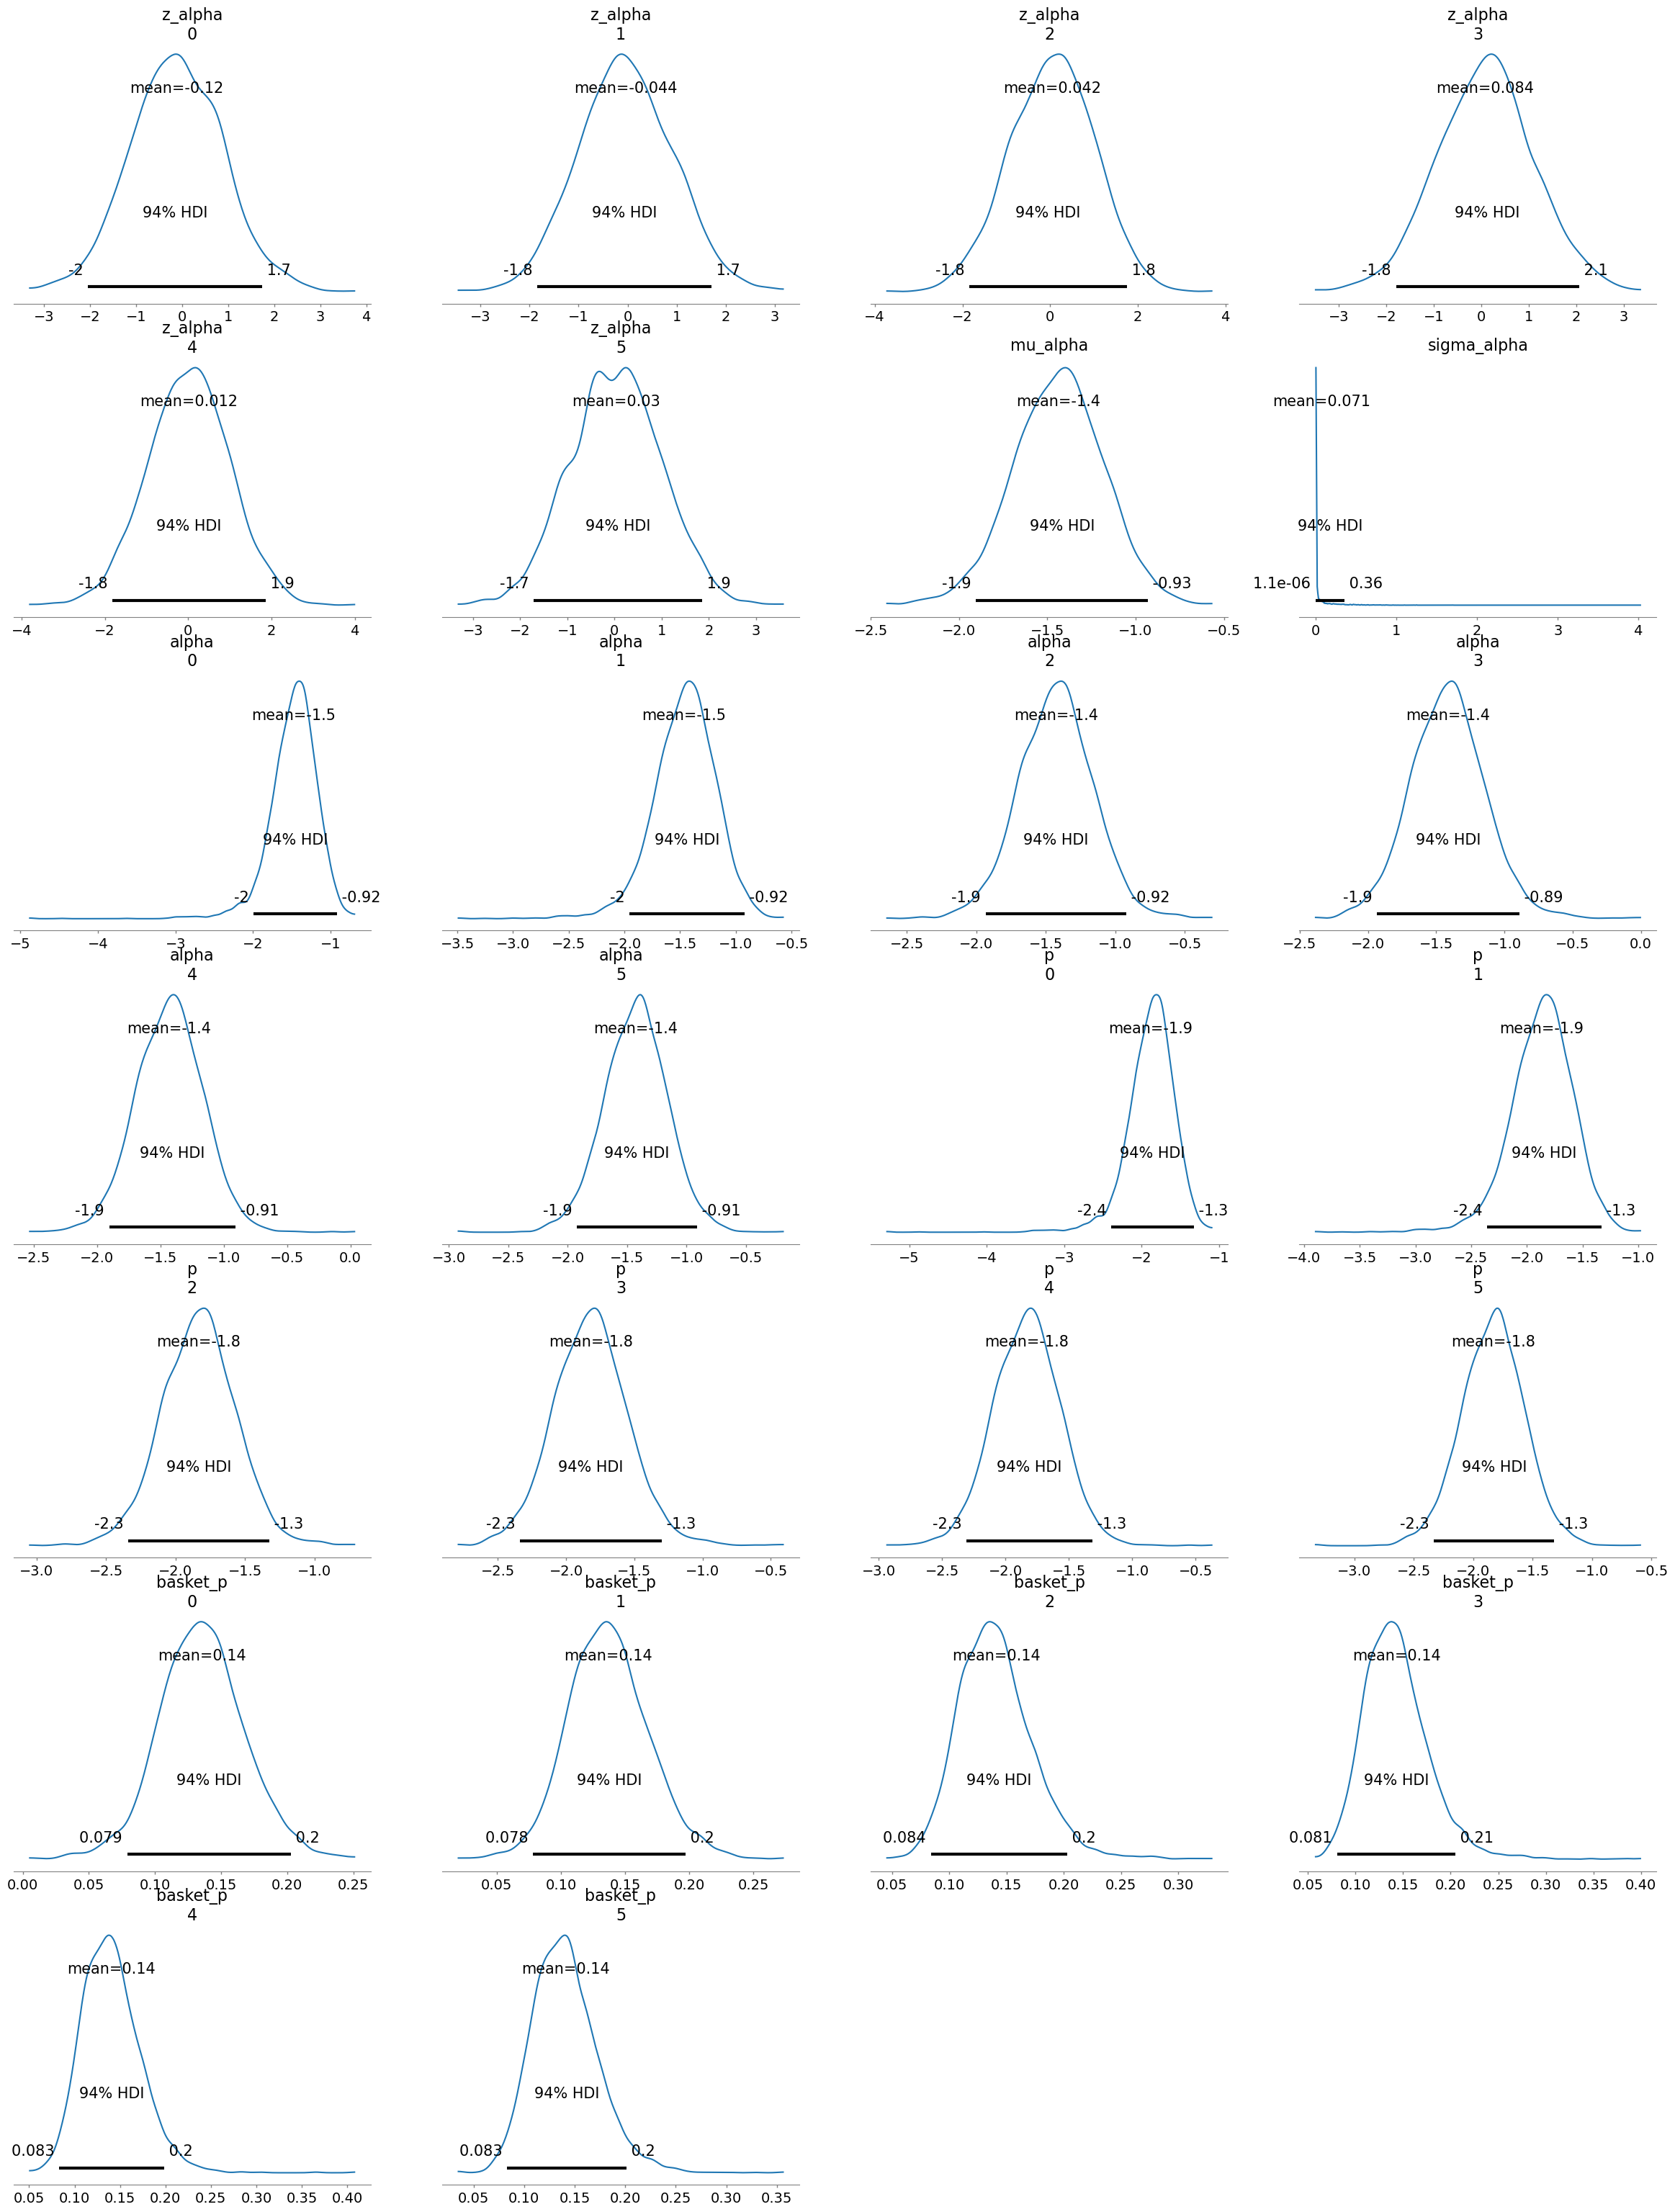

In [21]:
trial.plot_posterior(analysis_name, -1)

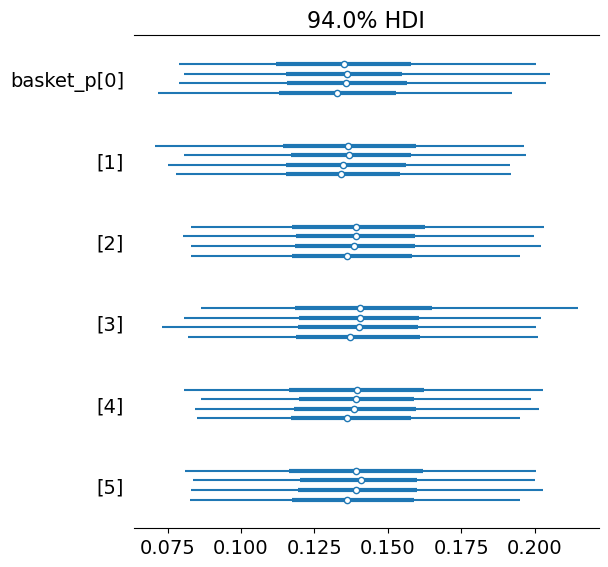

In [22]:
trial.plot_forest(analysis_name, -1)

In [23]:
trial.interim_report(analysis_name)

,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.00425,0.05,False,OPEN,1,14
1,0.00550,0.05,False,OPEN,1,14
2,0.02575,0.05,False,OPEN,4,14
3,0.00500,0.05,False,OPEN,2,14
4,0.02125,0.05,False,OPEN,4,14
5,0.01475,0.05,False,OPEN,3,14


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.02825,0.9,False,COMPLETED_INEFFECTIVE,1,24
1,0.03175,0.9,False,COMPLETED_INEFFECTIVE,2,24
2,0.04525,0.9,False,COMPLETED_INEFFECTIVE,4,24
3,0.05725,0.9,False,COMPLETED_INEFFECTIVE,5,24
4,0.04175,0.9,False,COMPLETED_INEFFECTIVE,4,24
5,0.04400,0.9,False,COMPLETED_INEFFECTIVE,4,24


In [24]:
trial.final_report(analysis_name)

,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.02825,0.9,False,COMPLETED_INEFFECTIVE,1,24
1,0.03175,0.9,False,COMPLETED_INEFFECTIVE,2,24
2,0.04525,0.9,False,COMPLETED_INEFFECTIVE,4,24
3,0.05725,0.9,False,COMPLETED_INEFFECTIVE,5,24
4,0.04175,0.9,False,COMPLETED_INEFFECTIVE,4,24
5,0.04400,0.9,False,COMPLETED_INEFFECTIVE,4,24
